In [18]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras import optimizers


In [2]:
from helper import get_class_names, get_train_data, get_test_data, plot_images, plot_model

In [3]:
matplotlib.style.use('ggplot')

In [4]:
class_names = get_class_names()
print(class_names)

Decoding file: data/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
num_classes = len(class_names)
print(num_classes)

10


In [6]:
IMAGE_SIZE = 32
CHANNELS = 3

In [7]:
images_train, labels_train, class_train = get_train_data()

Decoding file: data/data_batch_1
Decoding file: data/data_batch_2
Decoding file: data/data_batch_3
Decoding file: data/data_batch_4
Decoding file: data/data_batch_5


In [8]:
print(labels_train)

[6 9 9 ... 9 1 1]


In [9]:
print(class_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
images_test, labels_test, class_test = get_test_data()

Decoding file: data/test_batch


In [11]:
print("Training set size:\t",len(images_train))
print("Testing set size:\t",len(images_test))

Training set size:	 50000
Testing set size:	 10000


In [12]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

In [13]:
modeladam = cnn_model()
modelsgd = cnn_model()
modelrmsprop = cnn_model()
modeladagrad = cnn_model()
modeladadelta = cnn_model()
modeladamax = cnn_model()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
________________________________________________

In [14]:
checkpoint = ModelCheckpoint('best_model_simple.h5',  
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only= True, 
                                mode='auto') 

In [15]:
modeladam.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

In [19]:
sgd = optimizers.SGD(lr=1.0e-4, decay=1e-6, momentum=0.9, nesterov=True)
modelsgd.compile(loss='categorical_crossentropy', 
              optimizer=sgd, # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

In [20]:
rmsprop=optimizers.RMSprop(learning_rate=1.0e-4, rho=0.9)
modelrmsprop.compile(loss='categorical_crossentropy', 
              optimizer=rmsprop, # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

In [21]:
adagrad=optimizers.Adagrad(learning_rate=1.0e-4)
modeladagrad.compile(loss='categorical_crossentropy', 
              optimizer=adagrad, # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

In [22]:
adadelta=optimizers.Adadelta(learning_rate=1.0e-4, rho=0.9)
modeladadelta.compile(loss='categorical_crossentropy', 
              optimizer=adadelta, # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

In [23]:
adamax=optimizers.Adamax(learning_rate=1.0e-4, beta_1=0.9, beta_2=0.999)
modeladamax.compile(loss='categorical_crossentropy', 
              optimizer=adamax, # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

In [24]:
modeladam_details = modeladam.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 168s 3ms/step - loss: 1.9361 - accuracy: 0.2839 - val_loss: 1.6285 - val_accuracy: 0.4149
Epoch 2/50
50000/50000 [==============================] - 176s 4ms/step - loss: 1.5821 - accuracy: 0.4239 - val_loss: 1.4419 - val_accuracy: 0.4862
Epoch 3/50
50000/50000 [==============================] - 172s 3ms/step - loss: 1.4467 - accuracy: 0.4741 - val_loss: 1.3695 - val_accuracy: 0.5121
Epoch 4/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.3633 - accuracy: 0.5101 - val_loss: 1.2751 - val_accuracy: 0.5483
Epoch 5/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.3070 - accuracy: 0.5309 - val_loss: 1.2159 - val_accuracy: 0.5718
Epoch 6/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.2592 - accuracy: 0.5531 - val_loss: 1.1730 - val_accuracy: 0.5869
Epoch 7/50
500

In [25]:
modelsgd_details = modelsgd.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 183s 4ms/step - loss: 2.3068 - accuracy: 0.0992 - val_loss: 2.3006 - val_accuracy: 0.1272
Epoch 2/50
50000/50000 [==============================] - 186s 4ms/step - loss: 2.3023 - accuracy: 0.1073 - val_loss: 2.2980 - val_accuracy: 0.1552
Epoch 3/50
50000/50000 [==============================] - 194s 4ms/step - loss: 2.2994 - accuracy: 0.1139 - val_loss: 2.2957 - val_accuracy: 0.1636
Epoch 4/50
50000/50000 [==============================] - 195s 4ms/step - loss: 2.2967 - accuracy: 0.1198 - val_loss: 2.2931 - val_accuracy: 0.1729
Epoch 5/50
50000/50000 [==============================] - 196s 4ms/step - loss: 2.2939 - accuracy: 0.1259 - val_loss: 2.2897 - val_accuracy: 0.1757
Epoch 6/50
50000/50000 [==============================] - 195s 4ms/step - loss: 2.2909 - accuracy: 0.1321 - val_loss: 2.2852 - val_accuracy: 0.1876
Epoch 7/50
50000/50000 [==============================] - 201s

In [26]:
modelrmsprop_details = modelrmsprop.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 166s 3ms/step - loss: 1.9454 - accuracy: 0.2819 - val_loss: 1.7066 - val_accuracy: 0.3881
Epoch 2/50
50000/50000 [==============================] - 169s 3ms/step - loss: 1.6749 - accuracy: 0.3876 - val_loss: 1.6593 - val_accuracy: 0.4046
Epoch 3/50
50000/50000 [==============================] - 170s 3ms/step - loss: 1.5753 - accuracy: 0.4246 - val_loss: 1.4668 - val_accuracy: 0.4695
Epoch 4/50
50000/50000 [==============================] - 169s 3ms/step - loss: 1.4910 - accuracy: 0.4596 - val_loss: 1.4123 - val_accuracy: 0.4976
Epoch 5/50
50000/50000 [==============================] - 170s 3ms/step - loss: 1.4272 - accuracy: 0.4832 - val_loss: 1.3203 - val_accuracy: 0.5245
Epoch 6/50
50000/50000 [==============================] - 169s 3ms/step - loss: 1.3693 - accuracy: 0.5059 - val_loss: 1.2925 - val_accuracy: 0.5380
Epoch 7/50
50000/50000 [==============================] - 170s

In [27]:
modeladagrad_details = modeladagrad.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 199s 4ms/step - loss: 2.2828 - accuracy: 0.1276 - val_loss: 2.2602 - val_accuracy: 0.1816
Epoch 2/50
50000/50000 [==============================] - 202s 4ms/step - loss: 2.2441 - accuracy: 0.1578 - val_loss: 2.2149 - val_accuracy: 0.2178
Epoch 3/50
50000/50000 [==============================] - 185s 4ms/step - loss: 2.1914 - accuracy: 0.1891 - val_loss: 2.1525 - val_accuracy: 0.2499
Epoch 4/50
50000/50000 [==============================] - 182s 4ms/step - loss: 2.1363 - accuracy: 0.2082 - val_loss: 2.0918 - val_accuracy: 0.2651
Epoch 5/50
50000/50000 [==============================] - 176s 4ms/step - loss: 2.0873 - accuracy: 0.2302 - val_loss: 2.0462 - val_accuracy: 0.2777
Epoch 6/50
50000/50000 [==============================] - 184s 4ms/step - loss: 2.0564 - accuracy: 0.2376 - val_loss: 2.0190 - val_accuracy: 0.2830
Epoch 7/50
50000/50000 [==============================] - 173s

In [28]:
modeladadelta_details = modeladadelta.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 169s 3ms/step - loss: 2.3111 - accuracy: 0.0994 - val_loss: 2.3034 - val_accuracy: 0.1014
Epoch 2/50
50000/50000 [==============================] - 172s 3ms/step - loss: 2.3094 - accuracy: 0.1033 - val_loss: 2.3031 - val_accuracy: 0.1012
Epoch 3/50
50000/50000 [==============================] - 172s 3ms/step - loss: 2.3095 - accuracy: 0.1025 - val_loss: 2.3028 - val_accuracy: 0.1016
Epoch 4/50
50000/50000 [==============================] - 172s 3ms/step - loss: 2.3089 - accuracy: 0.1010 - val_loss: 2.3025 - val_accuracy: 0.1021
Epoch 5/50
50000/50000 [==============================] - 171s 3ms/step - loss: 2.3087 - accuracy: 0.1017 - val_loss: 2.3022 - val_accuracy: 0.1033
Epoch 6/50
50000/50000 [==============================] - 171s 3ms/step - loss: 2.3085 - accuracy: 0.1031 - val_loss: 2.3020 - val_accuracy: 0.1038
Epoch 7/50
50000/50000 [==============================] - 171s

In [29]:
modeladamax_details = modeladamax.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 168s 3ms/step - loss: 2.1254 - accuracy: 0.2102 - val_loss: 1.9361 - val_accuracy: 0.3182
Epoch 2/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.8728 - accuracy: 0.3178 - val_loss: 1.7514 - val_accuracy: 0.3841
Epoch 3/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.7325 - accuracy: 0.3708 - val_loss: 1.6351 - val_accuracy: 0.4137
Epoch 4/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.6315 - accuracy: 0.4055 - val_loss: 1.5372 - val_accuracy: 0.4424
Epoch 5/50
50000/50000 [==============================] - 169s 3ms/step - loss: 1.5641 - accuracy: 0.4288 - val_loss: 1.4747 - val_accuracy: 0.4686
Epoch 6/50
50000/50000 [==============================] - 169s 3ms/step - loss: 1.5160 - accuracy: 0.4469 - val_loss: 1.4308 - val_accuracy: 0.4867
Epoch 7/50
50000/50000 [==============================] - 169s

In [34]:
scores = model.evaluate(images_test, class_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.27%


Text(0.5, 1.0, 'training Loss curves')

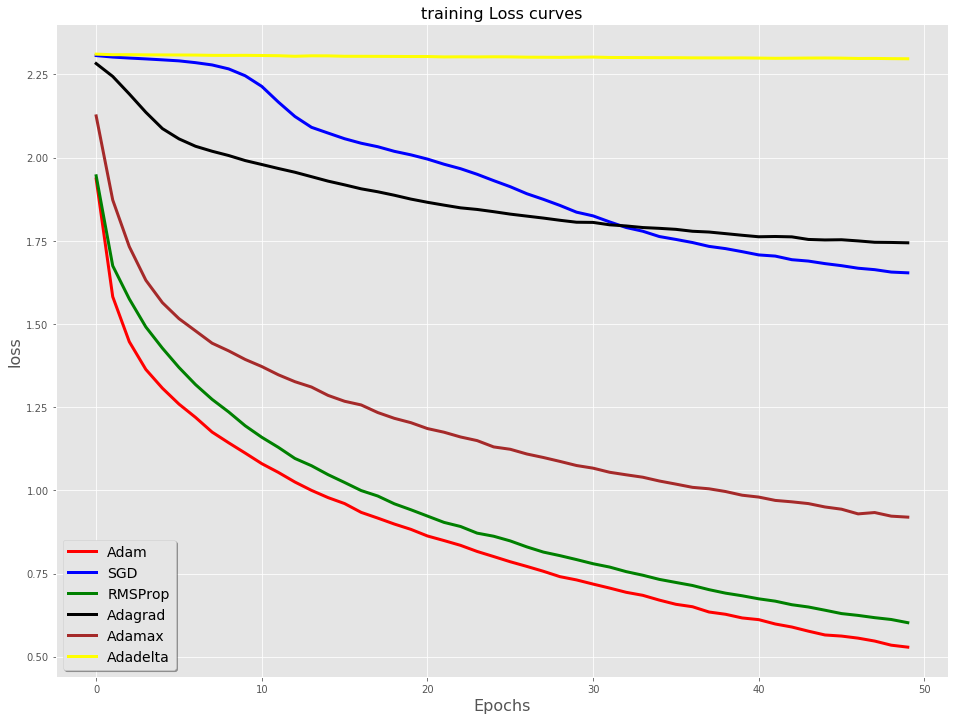

In [34]:
plt.figure(figsize= [16,12])
plt.plot(modeladam_details.history['loss'],'red',linewidth=3.0)
plt.plot(modelsgd_details.history['loss'],'blue',linewidth=3.0)
plt.plot(modelrmsprop_details.history['loss'],'green',linewidth=3.0)
plt.plot(modeladagrad_details.history['loss'],'black',linewidth=3.0)
plt.plot(modeladamax_details.history['loss'],'brown',linewidth=3.0)
plt.plot(modeladadelta_details.history['loss'],'yellow',linewidth=3.0)
plt.legend(('Adam', 'SGD','RMSProp','Adagrad','Adamax','Adadelta'), fontsize=14, shadow=True)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('training Loss curves', fontsize=16)

Text(0.5, 1.0, 'validation Loss curves')

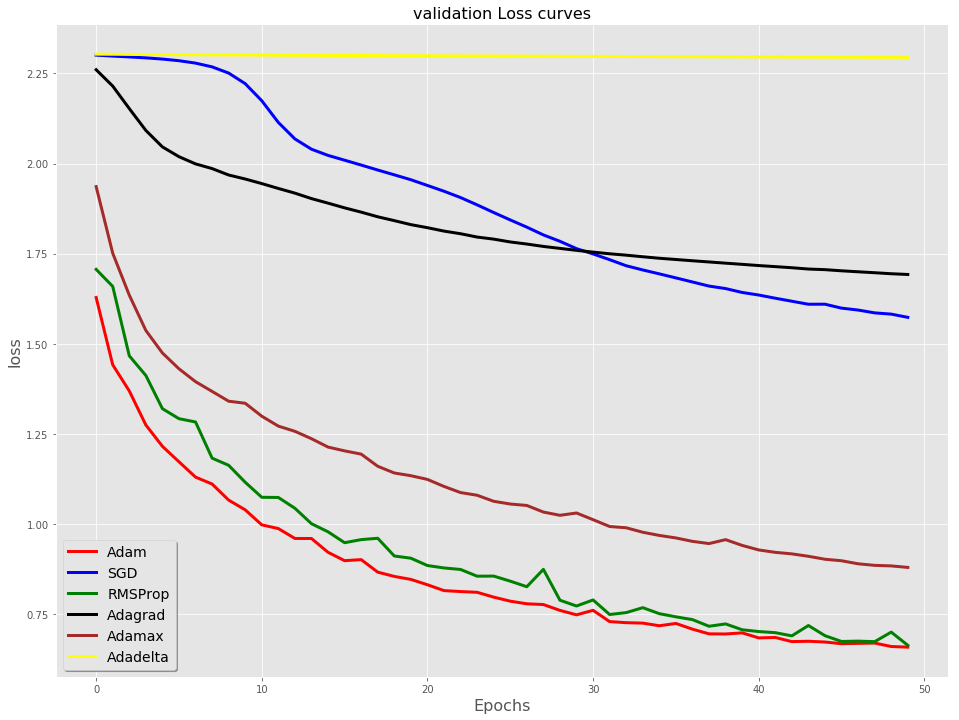

In [37]:
plt.figure(figsize= [16,12])
plt.plot(modeladam_details.history['val_loss'],'red',linewidth=3.0)
plt.plot(modelsgd_details.history['val_loss'],'blue',linewidth=3.0)
plt.plot(modelrmsprop_details.history['val_loss'],'green',linewidth=3.0)
plt.plot(modeladagrad_details.history['val_loss'],'black',linewidth=3.0)
plt.plot(modeladamax_details.history['val_loss'],'brown',linewidth=3.0)
plt.plot(modeladadelta_details.history['val_loss'],'yellow',linewidth=3.0)
plt.legend(('Adam', 'SGD','RMSProp','Adagrad','Adamax','Adadelta'), fontsize=14, shadow= True)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('validation Loss curves', fontsize=16)